# Bubble Plot

Let's see if we can replicate the [Altair Bubble Plot example](https://altair-viz.github.io/gallery/bubble_plot.html) with a MapD backend

In [3]:
import mapd_renderer
import ibis
import altair as alt

In [4]:
TABLE_NAME = "cars"

In [5]:
conn = ibis.mapd.connect(host='qs-dev.mapd.com', port='9092', 
    user='mapd', password='HyperInteractive', 
    database='mapd', protocol='http')

In [6]:
conn.table(TABLE_NAME)

DatabaseTable[table]
  name: cars
  schema:
    Acceleration : double
    Cylinders : int64
    Displacement : double
    Horsepower : double
    Miles_per_Gallon : double
    Name : string
    Origin : string
    Weight_in_lbs : int64
    year_ : timestamp

In [7]:
t = conn.table(TABLE_NAME)
expr = t[
    t.Horsepower,
    t.Miles_per_Gallon,
    t.Acceleration,
    ibis.row_id()
]

In [11]:
def chart(source):
    return alt.Chart(source).mark_circle(fill='blue', opacity=0.1).encode(
        alt.X(
            'Horsepower:Q',
            scale=alt.Scale(domain=[0, 240], range='width')
        ),
        alt.Y(
            'Miles_per_Gallon:Q',
            scale=alt.Scale(domain=[0, 50], range='height')
        ),
        alt.Size(
            'Acceleration:Q',
            scale=alt.Scale(domain=[0, 20])
        )
    )

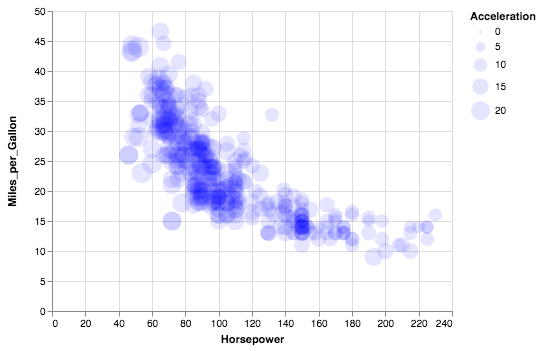

In [12]:
alt.renderers.enable('default')
chart(expr.execute())

In [13]:
alt.renderers.enable('mapd', conn=conn)
chart(expr.compile())